In [152]:
import pandas as pd
import numpy as np
import os
import gmaps
import matplotlib.pyplot as plt


In [153]:
sheet_names = ["MYE2 - 2017 All", "MYE2 - 2016 All", "MYE2 - 2015 All", "MYE2 - 2014 All", "MYE2 - 2013 All", "MYE2 - 2012 All"]
df_2012_to_2017 = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name=sheet_names)

In [154]:
def age_aggregator(df,list_of_age_ranges,sheet_name=""):
    """ Function to sum age columns in dataframe
    
    Arguments:
    df -- the pandas dataframe (data from UK dataset)
    list_of_age_ranges -- a list of tuples specifying the age ranges
    """
    new_df = pd.DataFrame()
    new_df.loc[:, "Name"] = df["Name"].copy()
    for tup in list_of_age_ranges:
        prefix = sheet_name[7:11]
        col_name = f"{prefix}: {tup[0]} - {tup[1]-1} yrs ('000s)"
        print(f"Calculating total age for {col_name}")
        col_list = list(range(tup[0],tup[1]))
        try:
            df_subset = df[col_list].copy()
            df_subset_sum = df_subset.sum(axis=1) / 1000
            new_df.loc[:, col_name] = df_subset_sum.values
        except KeyError:
            print(f"One or more of the following columns in the list {col_list} does not exist.")
    return new_df

In [157]:
master_df = pd.DataFrame()
list_of_age_ranges = [(18,35),(35,51),(51,68),(68,91)]

for sheet in sheet_names:
    current_df = df_2012_to_2017[sheet]
    current_df_by_region = current_df[current_df["Geography"]=="Region"].copy()
    popn_data_summary = age_aggregator(current_df_by_region,list_of_age_ranges,sheet)
    if master_df.size == 0:
        master_df = popn_data_summary.copy()
    else:
        master_df = pd.merge(master_df, popn_data_summary, on="Name")

Calculating total age for 2017: 18 - 34 yrs ('000s)
Calculating total age for 2017: 35 - 50 yrs ('000s)
Calculating total age for 2017: 51 - 67 yrs ('000s)
Calculating total age for 2017: 68 - 90 yrs ('000s)
Calculating total age for 2016: 18 - 34 yrs ('000s)
Calculating total age for 2016: 35 - 50 yrs ('000s)
Calculating total age for 2016: 51 - 67 yrs ('000s)
Calculating total age for 2016: 68 - 90 yrs ('000s)
Calculating total age for 2015: 18 - 34 yrs ('000s)
Calculating total age for 2015: 35 - 50 yrs ('000s)
Calculating total age for 2015: 51 - 67 yrs ('000s)
Calculating total age for 2015: 68 - 90 yrs ('000s)
Calculating total age for 2014: 18 - 34 yrs ('000s)
Calculating total age for 2014: 35 - 50 yrs ('000s)
Calculating total age for 2014: 51 - 67 yrs ('000s)
Calculating total age for 2014: 68 - 90 yrs ('000s)
Calculating total age for 2013: 18 - 34 yrs ('000s)
Calculating total age for 2013: 35 - 50 yrs ('000s)
Calculating total age for 2013: 51 - 67 yrs ('000s)
Calculating 

In [158]:
master_df

,Name,2017: 18 - 34 yrs ('000s),2017: 35 - 50 yrs ('000s),2017: 51 - 67 yrs ('000s),2017: 68 - 90 yrs ('000s),2016: 18 - 34 yrs ('000s),2016: 35 - 50 yrs ('000s),2016: 51 - 67 yrs ('000s),2016: 68 - 90 yrs ('000s),2015: 18 - 34 yrs ('000s),...,2014: 51 - 67 yrs ('000s),2014: 68 - 90 yrs ('000s),2013: 18 - 34 yrs ('000s),2013: 35 - 50 yrs ('000s),2013: 51 - 67 yrs ('000s),2013: 68 - 90 yrs ('000s),2012: 18 - 34 yrs ('000s),2012: 35 - 50 yrs ('000s),2012: 51 - 67 yrs ('000s),2012: 68 - 90 yrs ('000s)
0,NORTH EAST,587.174,516.735,588.552,424.855,587.944,523.886,583.861,415.255,585.697,...,580.488,389.622,583.892,547.401,572.469,381.703,578.142,558.907,564.490,375.816
1,NORTH WEST,1613.689,1476.167,1517.436,1108.059,1614.025,1487.203,1504.187,1085.106,1605.806,...,1492.938,1015.667,1594.099,1531.817,1471.745,996.063,1590.440,1557.136,1450.709,981.258
2,YORKSHIRE AND THE HUMBER,1233.728,1100.620,1126.094,831.207,1234.621,1109.563,1115.778,813.008,1228.631,...,1107.728,760.786,1223.019,1139.998,1092.289,744.873,1217.357,1156.176,1078.384,732.060
3,EAST MIDLANDS,1040.991,974.246,1013.911,753.775,1029.699,979.901,1000.962,734.167,1019.926,...,987.496,680.730,1000.898,1002.088,971.361,663.129,990.255,1015.263,958.089,647.462
4,WEST MIDLANDS,1319.456,1187.522,1173.947,896.877,1307.013,1193.066,1160.317,878.027,1289.739,...,1145.894,828.706,1267.757,1213.950,1130.665,811.494,1255.984,1229.276,1117.513,795.583
5,EAST,1246.559,1306.522,1285.179,1005.731,1251.818,1311.504,1269.374,982.539,1251.947,...,1257.216,910.966,1236.417,1317.845,1237.898,885.708,1228.540,1327.152,1219.745,864.925
6,LONDON,2395.768,2118.866,1457.408,851.600,2436.553,2097.094,1421.217,833.018,2453.180,...,1354.182,786.395,2452.507,1993.486,1314.679,769.407,2457.216,1963.712,1277.652,757.040
7,SOUTH EAST,1850.778,1943.717,1887.784,1454.681,1856.056,1955.101,1865.227,1419.625,1850.218,...,1839.495,1318.268,1837.958,1973.660,1808.908,1282.100,1829.862,1985.682,1780.619,1252.492
8,SOUTH WEST,1129.160,1098.229,1222.571,1012.879,1125.136,1105.821,1207.545,987.573,1120.980,...,1196.791,918.665,1101.291,1132.086,1179.787,894.919,1088.354,1146.466,1165.649,875.013


In [159]:
df_2016 = master_df[["Name", "2016: 18 - 34 yrs ('000s)","2016: 35 - 50 yrs ('000s)",
                     "2016: 51 - 67 yrs ('000s)", "2016: 68 - 90 yrs ('000s)"]]
df_2016 = df_2016.rename(columns = {"2016: 18 - 34 yrs ('000s)":"18 - 34 yrs","2016: 35 - 50 yrs ('000s)":"35 - 50 yrs",
                                    "2016: 51 - 67 yrs ('000s)":"51 - 67 yrs","2016: 68 - 90 yrs ('000s)":"68 - 90 yrs"})



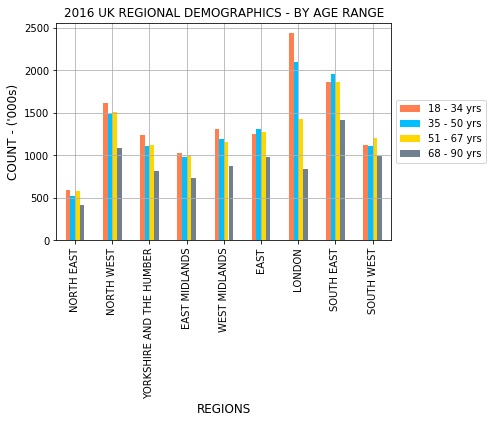

In [172]:
chart = df_2016.plot(x="Name",y=["18 - 34 yrs","35 - 50 yrs", 
                         "51 - 67 yrs", "68 - 90 yrs"],kind="bar",align="center",
                     color=["coral","deepskyblue","gold","slategrey"])
chart.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT - ('000s)",size=12)
plt.title("2016 UK REGIONAL DEMOGRAPHICS - BY AGE RANGE")
plt.grid()
plt.savefig("../Visualizations/age_range_bar_chart.png",bbox_inches="tight")

In [175]:
gender_sheets_2016 = ["MYE2 - 2016 M", "MYE2 - 2016 F"]
gender_master = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name=gender_sheets_2016)

In [176]:
def gender_by_age_aggregator(df,list_of_age_ranges,sheet_name=""):
    """ Function to sum age columns in dataframe
    
    Arguments:
    df -- the pandas dataframe (data from UK dataset)
    list_of_age_ranges -- a list of tuples specifying the age ranges
    """
    new_gender_df = pd.DataFrame()
    new_gender_df.loc[:, "Name"] = df["Name"].copy()
    for tup in list_of_age_ranges:
        prefix = sheet_name[12:13]
        col_name = f"{prefix}: {tup[0]} - {tup[1]-1} yrs ('000s)"
        print(f"Calculating total age for {col_name}")
        col_list = list(range(tup[0],tup[1]))
        try:
            gender_df_subset = df[col_list].copy()
            gender_df_subset_sum = gender_df_subset.sum(axis=1) / 1000
            new_gender_df.loc[:, col_name] = gender_df_subset_sum.values
        except KeyError:
            print(f"One or more of the following columns in the list {col_list} does not exist.")
    return new_gender_df

In [177]:
gender_master_df = pd.DataFrame()
list_of_age_ranges = [(18,35),(35,51),(51,68),(68,91)]

for sheet in gender_sheets_2016:
    current_gender_df = gender_master[sheet]
    current_gender_df_by_region = current_gender_df[current_gender_df["Geography"]=="Region"].copy()
    gender_popn_data_summary = gender_by_age_aggregator(current_gender_df_by_region,list_of_age_ranges,sheet)
    if gender_master_df.size == 0:
        gender_master_df = gender_popn_data_summary.copy()
    else:
        gender_master_df = pd.merge(gender_master_df, gender_popn_data_summary, on="Name")

Calculating total age for M: 18 - 34 yrs ('000s)
Calculating total age for M: 35 - 50 yrs ('000s)
Calculating total age for M: 51 - 67 yrs ('000s)
Calculating total age for M: 68 - 90 yrs ('000s)
Calculating total age for F: 18 - 34 yrs ('000s)
Calculating total age for F: 35 - 50 yrs ('000s)
Calculating total age for F: 51 - 67 yrs ('000s)
Calculating total age for F: 68 - 90 yrs ('000s)


In [178]:
gender_master_df
gender_master_df = gender_master_df.rename(columns = {"M: 18 - 34 yrs ('000s)":"M: 18 - 34 yrs",
                                                      "M: 35 - 50 yrs ('000s)":"M: 35 - 50 yrs",
       "M: 51 - 67 yrs ('000s)":"M: 51 - 67 yrs", "M: 68 - 90 yrs ('000s)":"M: 68 - 90 yrs",
       "F: 18 - 34 yrs ('000s)":"F: 18 - 34 yrs", "F: 35 - 50 yrs ('000s)":"F: 35 - 50 yrs",
       "F: 51 - 67 yrs ('000s)":"F: 51 - 67 yrs", "F: 68 - 90 yrs ('000s)":"F: 68 - 90 yrs"})
gender_master_df

,Name,M: 18 - 34 yrs,M: 35 - 50 yrs,M: 51 - 67 yrs,M: 68 - 90 yrs,F: 18 - 34 yrs,F: 35 - 50 yrs,F: 51 - 67 yrs,F: 68 - 90 yrs
0,NORTH EAST,297.359,255.858,285.071,185.516,290.585,268.028,298.790,229.739
1,NORTH WEST,815.021,734.257,742.009,485.655,799.004,752.946,762.178,599.451
2,YORKSHIRE AND THE HUMBER,623.653,551.819,552.093,361.314,610.968,557.744,563.685,451.694
3,EAST MIDLANDS,521.448,484.045,495.058,333.574,508.251,495.856,505.904,400.593
4,WEST MIDLANDS,664.962,592.561,573.306,394.571,642.051,600.505,587.011,483.456
5,EAST,633.367,647.485,623.642,443.493,618.451,664.019,645.732,539.046
6,LONDON,1230.502,1064.653,693.010,366.305,1206.051,1032.441,728.207,466.713
7,SOUTH EAST,940.967,962.825,918.779,634.019,915.089,992.276,946.448,785.606
8,SOUTH WEST,574.656,544.882,589.159,445.215,550.480,560.939,618.386,542.358


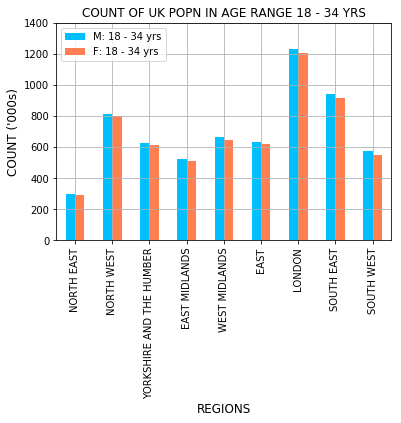

In [191]:
gender_18_to_34 = gender_master_df.plot(x="Name",y=["M: 18 - 34 yrs","F: 18 - 34 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("COUNT OF UK POPN IN AGE RANGE 18 - 34 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.grid()
plt.savefig("../Visualizations/18_to_34_gender_bar_chart.png",bbox_inches="tight")

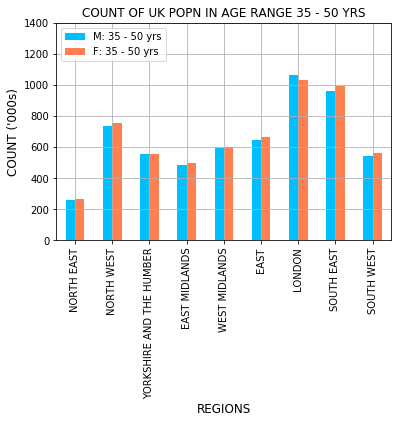

In [190]:
gender_35_to_50 = gender_master_df.plot(x="Name",y=["M: 35 - 50 yrs","F: 35 - 50 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("COUNT OF UK POPN IN AGE RANGE 35 - 50 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.grid()
plt.legend(loc="upper left")
plt.savefig("../Visualizations/35_to_50_gender_bar_chart.png",bbox_inches="tight")

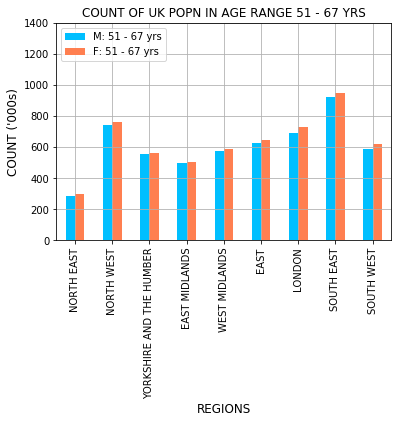

In [189]:
gender_51_to_67 = gender_master_df.plot(x="Name",y=["M: 51 - 67 yrs","F: 51 - 67 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("COUNT OF UK POPN IN AGE RANGE 51 - 67 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.legend(loc="upper left")
plt.grid()
plt.savefig("../Visualizations/51_to_67_gender_bar_chart.png",bbox_inches="tight")

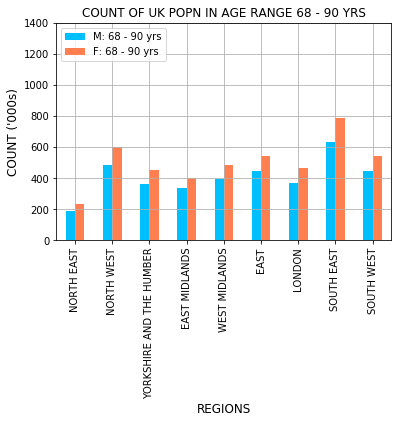

In [188]:
gender_68_to_90 = gender_master_df.plot(x="Name",y=["M: 68 - 90 yrs","F: 68 - 90 yrs"],kind="bar",color=["deepskyblue","coral"])
plt.legend
plt.title("COUNT OF UK POPN IN AGE RANGE 68 - 90 YRS")
plt.xlabel("REGIONS",size=12)
plt.ylabel("COUNT ('000s)",size=12)
plt.ylim((0,1400))
plt.legend(loc="upper left")
plt.grid()
plt.savefig("../Visualizations/68_to_90_gender_bar_chart.png",bbox_inches="tight")

In [194]:
data_2016_m = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name="MYE2 - 2016 M")
data_2016_m[data_2016_m["Geography"].str.match("Region")]


,Code,Name,Geography,All ages,0,1,2,3,4,5,...,81,82,83,84,85,86,87,88,89,90
4,E12000001,NORTH EAST,Region,1293982,14804,14874,15244,15616,16088,16119,...,6685,5908,5340,4888,4312,3680,3012,2470,2056,6449
18,E12000002,NORTH WEST,Region,3563196,44547,44671,44957,45916,47162,46117,...,16870,14737,13353,12207,11070,9423,7874,6627,5492,17514
62,E12000003,YORKSHIRE AND THE HUMBER,Region,2678166,33204,33066,33597,34242,35396,34707,...,12736,11460,10195,9186,8224,6892,5996,4959,4197,13306
87,E12000004,EAST MIDLANDS,Region,2335322,27450,28135,27858,28763,30054,29749,...,11412,10118,9245,8640,7549,6564,5382,4460,3956,12434
133,E12000005,WEST MIDLANDS,Region,2878130,36509,36378,37315,38615,39215,38253,...,13800,12306,11242,10452,9238,8038,6675,5649,4799,14774
168,E12000006,EAST,Region,3021335,37575,37804,38632,39539,40482,40378,...,16016,14254,12828,12157,10730,9531,8151,6747,5626,18751
221,E12000007,LONDON,Region,4369201,66072,64507,63771,64565,65936,62256,...,13296,12133,11109,10316,9009,8153,6715,5680,4757,16534
255,E12000008,SOUTH EAST,Region,4449245,52966,53943,54778,56996,59336,59639,...,22143,19997,18326,17333,15788,13528,11814,9808,8512,28286
330,E12000009,SOUTH WEST,Region,2712343,30071,30295,30889,32050,33756,33031,...,15648,13821,12805,11734,10786,9557,8123,6695,5711,19333


In [213]:
data_2016_f = pd.read_excel("../Resources/2012-2017_Popn_Estimates.xlsx",skiprows=4,sheet_name="MYE2 - 2016 F")
data_2016_f = data_2016_f[data_2016_f["Geography"].str.match("Region")]
del data_2016_f["All ages"]


,Code,Name,Geography,0,1,2,3,4,5,6,...,81,82,83,84,85,86,87,88,89,90
4,E12000001,NORTH EAST,Region,13841,13749,14207,14676,15282,15338,15151,...,8656,7859,7409,6922,6576,5840,4968,4256,3705,15262
18,E12000002,NORTH WEST,Region,42242,42159,43099,43372,45057,44673,43422,...,21749,19999,18524,17991,16583,15160,13224,11449,10188,41899
62,E12000003,YORKSHIRE AND THE HUMBER,Region,31250,31765,31921,32821,33975,32958,33267,...,16796,15443,14196,13434,12632,11588,9974,8688,7709,31665
87,E12000004,EAST MIDLANDS,Region,26471,26240,26814,27851,28843,28495,27866,...,13991,12973,12167,11699,10980,9904,8946,7871,6936,29192
133,E12000005,WEST MIDLANDS,Region,34532,34542,35353,36244,37052,36641,35371,...,17499,15863,15091,14607,13674,12580,10936,9461,8287,35869
168,E12000006,EAST,Region,35894,35953,36624,37665,38858,38274,37983,...,19403,17982,16830,16433,15404,14225,12699,11152,9840,41798
221,E12000007,LONDON,Region,62752,61482,60425,61773,63119,59081,57293,...,17258,15715,14901,14059,13174,12448,10793,9361,7961,35672
255,E12000008,SOUTH EAST,Region,50326,51505,52232,53647,56654,56498,56093,...,27982,25857,24756,23791,22685,20810,18687,16341,14621,64664
330,E12000009,SOUTH WEST,Region,28597,28749,29753,30410,31631,31548,31238,...,19204,17736,17213,16461,15462,14319,12613,11527,9994,44444


In [214]:
data_2016_f.set_index("Name",inplace=True)
data_2016_f

,Code,Geography,0,1,2,3,4,5,6,7,...,81,82,83,84,85,86,87,88,89,90
Name,,,,,,,,,,,,,,,,,,,,,
NORTH EAST,E12000001,Region,13841,13749,14207,14676,15282,15338,15151,14586,...,8656,7859,7409,6922,6576,5840,4968,4256,3705,15262
NORTH WEST,E12000002,Region,42242,42159,43099,43372,45057,44673,43422,43028,...,21749,19999,18524,17991,16583,15160,13224,11449,10188,41899
YORKSHIRE AND THE HUMBER,E12000003,Region,31250,31765,31921,32821,33975,32958,33267,32887,...,16796,15443,14196,13434,12632,11588,9974,8688,7709,31665
EAST MIDLANDS,E12000004,Region,26471,26240,26814,27851,28843,28495,27866,27582,...,13991,12973,12167,11699,10980,9904,8946,7871,6936,29192
WEST MIDLANDS,E12000005,Region,34532,34542,35353,36244,37052,36641,35371,35787,...,17499,15863,15091,14607,13674,12580,10936,9461,8287,35869
EAST,E12000006,Region,35894,35953,36624,37665,38858,38274,37983,37444,...,19403,17982,16830,16433,15404,14225,12699,11152,9840,41798
LONDON,E12000007,Region,62752,61482,60425,61773,63119,59081,57293,56281,...,17258,15715,14901,14059,13174,12448,10793,9361,7961,35672
SOUTH EAST,E12000008,Region,50326,51505,52232,53647,56654,56498,56093,54719,...,27982,25857,24756,23791,22685,20810,18687,16341,14621,64664
SOUTH WEST,E12000009,Region,28597,28749,29753,30410,31631,31548,31238,30456,...,19204,17736,17213,16461,15462,14319,12613,11527,9994,44444


In [211]:
# average_age = data_2016_f.mean()
# # print(average_age)

# # Collect the years where data was collected
# age_holder = average_age.keys()

In [222]:
# age_avg_plot = plt.plot(age_holder, average_age, color="blue", label="Age Average")

# london_f, = plt.plot(age_holder, data_2016_f.loc['London',[0:90]], 
#                         color="green",label="London")
